# AfSIS Soil Chemistry Dataset - Exploratory analysis¶



## 1. Introduction

QED | https://qed.ai | info@qed.ai  


### 1.1 Prerequisities and import libraries


* To download data:
    * aws-cli
* To parse and manage datasets:
    * brukeropusreader
    * pandas 
    * tqdm

Installation below:

In [ ]:
#! pip install awscli brukeropusreader tqdm pandas matplotlib folium seaborn pathlib 

#commented out after the installation is completed in case you run again the notebook         

In [2]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import folium
from pathlib import Path
from brukeropusreader import read_file
from tqdm import tqdm_notebook as tqdm

###  1.2 Downloading the Soil Chemistry Dataset from AWS

Download s3 bucket content with the `aws-cli` command line tool. Run `aws configure` beforehand to set your credentials.

In [3]:
#! aws s3 sync s3://afsis afsis --no-sign-request 

# commented out after the download is completed in case you run again the notebook

### 1.3 Loading OPUS spectra

OPUS spectra are created using Bruker instruments Infrared spectrometers
To be opened [brukeropusreader](https://github.com/qedsoftware/brukeropusreader) package is needed. 

The function `brukeropusreader.read_file` parses the binaries and returns a data structure containing information about the wave numbers, absorbance spectra, and file metadata.


Here we plot a few of the spectra. 

## 2. Geographical references

The AfSIS Soil Chemistry Dataset contains georeferences for each spectra. 
It is worth noting that it consists of two datasets, one for the subsaharian Africa 
and one with additional data recorded only in Tanzania.

### 2.1 Dataframes exploration

In [4]:
GEOREFS_FILE1 = 'afsis/2009-2013/Georeferences/georeferences.csv' 
df_geo1 = pd.read_csv(GEOREFS_FILE1)# dataframe for several african countries
df_geo1 = df_geo1.sort_values(by=['Site', 'Cultivated'])
print(df_geo1.shape)
print(df_geo1.isna().sum())
df_geo1.head()

(1843, 14)
SSN                0
Public             0
Latitude           0
Longitude          0
Cluster            0
Plot               0
Depth              0
Soil material     94
Scientist          0
Site               0
Country            0
Region           232
Cultivated       798
Gid                0
dtype: int64


,SSN,Public,Latitude,Longitude,Cluster,Plot,Depth,Soil material,Scientist,Site,Country,Region,Cultivated,Gid
460,icr016032,True,5.423182,-0.709083,15,1,top,Aju.15.1.Topsoil.Std fine soil,Jerome Tondoh,Ajumako,Ghana,West Africa,False,345
500,icr016033,True,5.423182,-0.709083,15,1,sub,Aju.15.1.Subsoil.Std fine soil,Jerome Tondoh,Ajumako,Ghana,West Africa,False,346
666,icr015913,True,5.377035,-0.726425,9,1,sub,Aju.9.1.Subsoil.Std fine soil,Jerome Tondoh,Ajumako,Ghana,West Africa,False,334
732,icr016053,True,5.447667,-0.717422,16,1,sub,Aju.16.1.Subsoil.Std fine soil,Jerome Tondoh,Ajumako,Ghana,West Africa,False,348
957,icr015973,True,5.434675,-0.728883,12,1,sub,Aju.12.1.Subsoil.Std fine soil,Jerome Tondoh,Ajumako,Ghana,West Africa,False,340


In [5]:
GEOREFS_FILE2 = 'afsis/tansis/Georeferences/georeferences.csv' 
df_geo2 = pd.read_csv(GEOREFS_FILE2)# dataframe with additional data for Tanzania
df_geo2 = df_geo2.sort_values(by=['Site', 'Cultivated'])
print(df_geo2.shape)
print(df_geo2.isna().sum())
df_geo2.head()

(18819, 14)
Cluster          18595
Country              0
Cultivated       18597
Depth            18595
Gid              18595
Latitude             0
Longitude            0
Plot             18595
Region           18597
SSN                  0
Sampling date    18819
Scientist        18595
Site             18595
Soil material    18626
dtype: int64


,Cluster,Country,Cultivated,Depth,Gid,Latitude,Longitude,Plot,Region,SSN,Sampling date,Scientist,Site,Soil material
29,2.0,Tanzania,False,top,46.0,-3.029698,33.015202,2.0,East Africa,icr011843,NaN,Leigh Winoweicki,Bukwaya,Buk.2.2.Topsoil.Std fine soil
31,4.0,Tanzania,False,top,48.0,-2.992815,33.016113,1.0,East Africa,icr011881,NaN,Leigh Winoweicki,Bukwaya,Buk.4.1.Topsoil.Std fine soil
32,5.0,Tanzania,False,top,49.0,-3.060982,33.030663,1.0,East Africa,icr011901,NaN,Leigh Winoweicki,Bukwaya,Buk.5.1.Topsoil.Std fine soil
35,8.0,Tanzania,False,top,52.0,-2.987467,33.033264,1.0,East Africa,icr011960,NaN,Leigh Winoweicki,Bukwaya,Buk.8.1.Topsoil.Std fine soil
36,9.0,Tanzania,False,top,53.0,-3.058480,33.065014,3.0,East Africa,icr011978,NaN,Leigh Winoweicki,Bukwaya,Buk.9.3.Topsoil.Std fine soil


In [6]:
geoafrica_list = df_geo1['SSN'].tolist()
geotanzania_list = df_geo2['SSN'].tolist()

print("samples from all Africa 2009-2013 dataset", len(geoafrica_list))
print("samples from Tanzania 2014 dataset", len(geotanzania_list))

samples from all Africa 2009-2013 dataset 1843
samples from Tanzania 2014 dataset 18819


In [7]:
# Find Rows in all_Africa Which Are Not Available in Tanzania dataset 
df_geo_diff = set(df_geo1['SSN']).difference(set(df_geo2['SSN']))
print('samples in whole africa 2009-2013 dataset that are not in 2014 Tanzanian dataset:',len(df_geo_diff))

df_geo_diff1 = set(df_geo2['SSN']).difference(set(df_geo1['SSN']))
print('samples in Tanzanian dataset that are not in 2009-2013 dataset:',len(df_geo_diff1))

samples in whole africa 2009-2013 dataset that are not in 2014 Tanzanian dataset: 1619
samples in Tanzanian dataset that are not in 2009-2013 dataset: 18450


In [8]:
diff_list = list(df_geo_diff)
# list of entries in 2009-13 dataset not found in the larger 2014 dataset

In [9]:
mask_diff = df_geo1[df_geo1['SSN'].isin(diff_list )]


In [10]:
df_geoall = pd.concat([df_geo2, mask_diff]) 
listall = df_geoall['SSN'].tolist()
print(df_geoall.shape)

(20438, 15)


### 2.2 Data for cultivated/fertile land

In [11]:
df_cultivated = df_geoall.dropna(subset=['Cultivated']) 
#df_cultivated2 = df_geo2.dropna(subset=['Cultivated']) 

#df_cultivated = df_cultivated1.append(df_cultivated2, ignore_index=True)

In [12]:
print(df_cultivated.shape)
print(len(df_cultivated.SSN.unique()))
print("")
print(df_cultivated.isna().sum())
print(df_cultivated.Site.unique(), len(df_cultivated.Site.unique()))
df_cultivated.head()

(1045, 15)
1045

Cluster             0
Country             0
Cultivated          0
Depth               0
Gid                 0
Latitude            0
Longitude           0
Plot                0
Region             66
SSN                 0
Sampling date    1045
Scientist           0
Site                0
Soil material      63
Public            222
dtype: int64
['Bukwaya' 'Chinyanghuku' 'Itende' 'Kiberashi' 'Kidatu' 'Mbinga'
 'Pandambili' 'Ajumako' 'Chica_b' 'Chiculecule' 'Chilende' 'Dambidolo'
 'Fisenge' 'Gambisa' 'Hoima' 'Ibi' 'Ihassunge' 'Imorun' 'Katsina ala'
 'Koloko' 'Kontela' 'Kubeasi' 'Kutaber' 'Lambussie' 'Macassangila'
 'Madadeni' 'Martinho' 'Massuque' 'Monga' 'Musungwa' 'Namasuba' 'Prieska'
 'Thuchila'] 33


,Cluster,Country,Cultivated,Depth,Gid,Latitude,Longitude,Plot,Region,SSN,Sampling date,Scientist,Site,Soil material,Public
29,2.0,Tanzania,False,top,46.0,-3.029698,33.015202,2.0,East Africa,icr011843,NaN,Leigh Winoweicki,Bukwaya,Buk.2.2.Topsoil.Std fine soil,NaN
31,4.0,Tanzania,False,top,48.0,-2.992815,33.016113,1.0,East Africa,icr011881,NaN,Leigh Winoweicki,Bukwaya,Buk.4.1.Topsoil.Std fine soil,NaN
32,5.0,Tanzania,False,top,49.0,-3.060982,33.030663,1.0,East Africa,icr011901,NaN,Leigh Winoweicki,Bukwaya,Buk.5.1.Topsoil.Std fine soil,NaN
35,8.0,Tanzania,False,top,52.0,-2.987467,33.033264,1.0,East Africa,icr011960,NaN,Leigh Winoweicki,Bukwaya,Buk.8.1.Topsoil.Std fine soil,NaN
36,9.0,Tanzania,False,top,53.0,-3.058480,33.065014,3.0,East Africa,icr011978,NaN,Leigh Winoweicki,Bukwaya,Buk.9.3.Topsoil.Std fine soil,NaN


## 3. Dry Chemistry

The AfSIS Soil Chemistry dataset contains dry and wet chemistry data taken at each sampling location.


### 3.1  X-ray fluorescence (XRF) elemental analysis

with XRF we get the concentration of various chemical elements in the sample

Units are parts per million (ppm) 

https://www.elementalanalysis.com/xrf.html

In [13]:
file1path = "afsis/2009-2013/Dry_Chemistry/ICRAF/Bruker_TXRF/TXRF.csv"
file2path = "afsis/tansis/Dry_Chemistry/ICRAF/Bruker_TXRF/TXRF.csv"
xrf_africa = pd.read_csv(file1path)
xrf_tanzania = pd.read_csv(file2path)

print('measurements 2009-13',xrf_africa.shape,'measurements  2014', xrf_tanzania.shape)

print("the table below shows the concentration in ppm for each element detected")
xrf_africa.head() 

measurements 2009-13 (1904, 42) measurements  2014 (224, 42)
the table below shows the concentration in ppm for each element detected


,SSN,Public,Na,Mg,Al,P,S,Cl,K,Ca,...,Pr,Nd,Sm,Hf,Ta,W,Hg,Pb,Bi,Th
0,icr005965,True,16023.3,4433.5,37618.6,84.4,45.7,268.1,12412.2,30705.6,...,0.9,14.7,14.0,0.9,2.5,0.2,4.9,3.9,0.1,13.4
1,icr005966,True,20524.6,5832.2,40248.2,72.1,45.7,229.6,12892.2,23234.5,...,1.1,15.8,18.2,0.5,3.2,0.2,4.2,3.3,0.1,19.9
2,icr005985,True,19350.4,5085.8,36766.3,50.6,45.7,157.3,16839.7,16746.2,...,1.2,19.2,14.1,0.8,2.0,1.2,2.6,12.0,0.1,17.9
3,icr005986,True,17410.2,5271.2,37912.2,50.6,45.7,285.2,16818.0,31939.6,...,1.1,16.7,12.6,0.3,1.2,0.5,6.3,10.2,0.1,16.5
4,icr005998,True,19092.5,9169.8,37359.8,50.6,45.7,251.4,17577.9,25298.2,...,1.1,16.7,17.2,0.5,3.2,0.4,4.2,5.6,0.1,18.4


In [14]:
mask_diff_xrf = xrf_africa[xrf_africa['SSN'].isin(diff_list )]
df_xrf = pd.concat([xrf_tanzania, mask_diff_xrf]) 

In [15]:
print(df_xrf.shape, len(df_xrf.SSN.unique()))

(1838, 42) 1838


In [16]:
print('important elements for agriculture') 
# https://www.qld.gov.au/environment/land/management/soil/soil-properties/fertility

important_elements = ['P','K', 'S','Ca','Mg','Cu','Zn','Fe', 'Mn','Mo' ]
df_xrf_reduced = df_xrf[important_elements]/10000# express in %
df_xrf_reduced['SSN'] = df_xrf['SSN']
df_xrf_reduced.head()

important elements for agriculture


,P,K,S,Ca,Mg,Cu,Zn,Fe,Mn,Mo,SSN
0,0.00844,1.24122,0.00457,3.07056,0.44335,0.00101,0.00253,2.22632,0.03561,0.01845,icr005965
1,0.00721,1.28922,0.00457,2.32345,0.58322,0.00118,0.00294,2.62696,0.03797,0.01845,icr005966
2,0.00506,1.68397,0.00457,1.67462,0.50858,0.00221,0.00324,2.27902,0.03234,0.01845,icr005985
3,0.00506,1.68180,0.00457,3.19396,0.52712,0.00249,0.00344,2.29391,0.03325,0.01845,icr005986
4,0.00506,1.75779,0.00457,2.52982,0.91698,0.00131,0.00354,2.49852,0.04083,0.01845,icr005998


In [17]:
# how disperse are the XRF data?
print(df_xrf_reduced.shape)
df_xrf_reduced.describe()

(1838, 11)


,P,K,S,Ca,Mg,Cu,Zn,Fe,Mn,Mo
count,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000
mean,0.011513,1.126107,0.007641,0.758606,0.730171,0.001519,0.002566,2.633472,0.040358,0.019379
std,0.046650,1.268460,0.040276,2.284191,0.733123,0.001496,0.002984,2.673819,0.052072,0.012800
min,0.002950,0.009040,0.003320,0.004400,0.402890,0.000050,0.000090,0.007430,0.000540,0.017950
25%,0.005060,0.240008,0.004570,0.046742,0.557500,0.000450,0.000780,0.779240,0.010405,0.018450
50%,0.005060,0.696950,0.004570,0.141455,0.557500,0.001125,0.001890,1.947845,0.022950,0.018450
75%,0.005060,1.624108,0.004570,0.518190,0.557500,0.002050,0.003437,3.452745,0.052255,0.018450
max,1.246380,10.627340,0.970400,42.643090,13.689340,0.012840,0.073000,22.908970,0.660790,0.444250


In [18]:
df_xrf_reduced = df_xrf_reduced.set_index('SSN') # set sample number as index


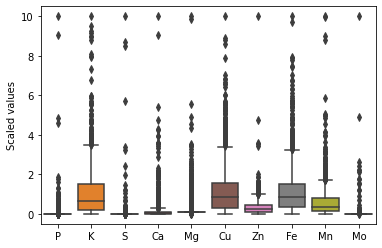

In [19]:
df_XRF_scaled =((df_xrf_reduced -df_xrf_reduced .min())/(df_xrf_reduced .max()-df_xrf_reduced .min()))*10

import seaborn as sns
%matplotlib inline
box_plot_scaled = sns.boxplot( data= df_XRF_scaled)
fig = box_plot_scaled.get_figure()
plt.ylabel("Scaled values")
fig.savefig("box.png", dpi= 100)

### 3.2 Fourier transform infrared spectroscopy (FTIR)

A word about units. Most spectra using electromagnetic radiation are presented with wavelength as the X-axis in nm or μm.  Originally, IR spectra were presented in units of micrometers.  Later (1953) a different measure, the wavenumber given the unit cm-1, was adopted.
    
ν (cm-1)= 10,000/λ (μm)

The spectra may appear to be "backward" (large wavenumber values on the left, running to low values on the right); this is a consequence of the μm to cm-1 conversion

####  3.2.1 NIR (near infrared range) FTIR 

spectral range: 12500 - 4000 cm-1 or 700 - 2500 nm

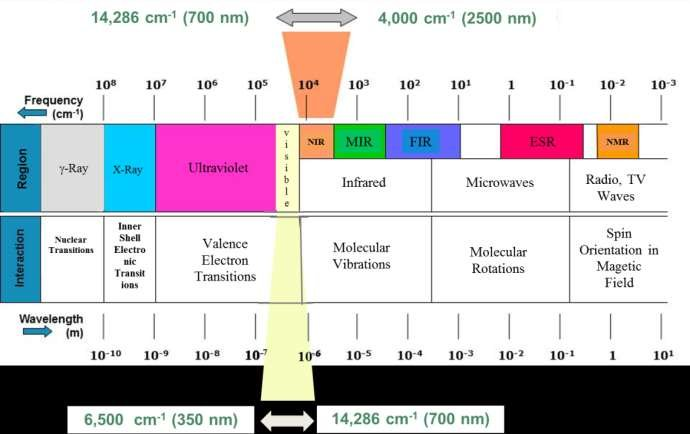

In [20]:
Image(filename='img/NIR.jpeg') 

In [21]:
NIR_SPECTRA_DIR = 'Bruker_MPA/*'
AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF')
names = []
spectra = []

for path in tqdm(AFSIS_PATH.glob(NIR_SPECTRA_DIR )):
    if path.is_file():
        spect_data = read_file(path)
        spectra.append(spect_data["AB"])
        names.append(path.stem)
wave_nums = spect_data.get_range()

column_names = ['{:.0f}'.format(x) for x in wave_nums]
near_infrared_df = pd.DataFrame(spectra, index=names, columns=column_names)
near_infrared_df.head()

<ipython-input-21-c9e4dc7ad1b6>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm(AFSIS_PATH.glob(NIR_SPECTRA_DIR )):


,12493,12489,12485,12482,12478,12474,12470,12466,12462,12458,...,3633,3630,3626,3622,3618,3614,3610,3606,3603,3599
icr033603,0.744053,0.744943,0.737978,0.734149,0.738894,0.741579,0.738796,0.740573,0.745435,0.745959,...,2.679350,2.639192,2.631729,2.611440,2.646616,2.508814,2.414326,2.423105,2.533958,2.656340
icr042897,0.553651,0.549628,0.549979,0.555073,0.561452,0.566700,0.571925,0.578335,0.582339,0.579222,...,2.455164,2.484992,2.565423,2.588626,2.550071,2.503246,2.361378,2.318084,2.421962,2.429910
icr049675,0.533260,0.531480,0.535772,0.545087,0.551631,0.550375,0.546267,0.545179,0.545328,0.542055,...,2.641663,2.420862,2.309041,2.268263,2.305246,2.589037,2.847070,2.433076,2.500584,2.292974
icr034693,0.568058,0.566100,0.563312,0.560136,0.556757,0.558751,0.566576,0.575022,0.580073,0.579828,...,2.410610,2.373128,2.324080,2.145765,2.025990,2.089124,2.294537,2.543749,2.517684,2.474452
icr033950,0.555743,0.550596,0.548068,0.554348,0.559019,0.554218,0.551323,0.556638,0.561071,0.562413,...,2.714783,2.360171,2.265779,2.247130,2.206304,2.150379,2.145735,2.169409,2.158581,2.150478


In [22]:
# table with FTIR spectra for each sample

df_NIR_FTIRspectra = near_infrared_df.T.reset_index()

df_NIR_FTIRspectra = df_NIR_FTIRspectra.rename(columns={'index': 'labda'})
df_NIR_FTIRspectra.labda = pd.to_numeric(df_NIR_FTIRspectra.labda)

df_NIR_FTIRspectra.head()

,labda,icr033603,icr042897,icr049675,icr034693,icr033950,icr034794,icr015953,icr050394,icr048771,...,icr073540,icr049437,icr037699,icr075004,icr056181,icr055563,icr010159,icr074792,icr011321,icr062275
0,12493,0.744053,0.553651,0.533260,0.568058,0.555743,0.643860,0.431300,0.684270,0.569734,...,0.268871,0.623325,0.427489,0.664087,0.612543,0.400455,0.604818,0.511006,0.633803,0.539674
1,12489,0.744943,0.549628,0.531480,0.566100,0.550596,0.648193,0.434562,0.684778,0.567334,...,0.266468,0.631448,0.425584,0.665025,0.612217,0.398957,0.605491,0.507771,0.635440,0.541978
2,12485,0.737978,0.549979,0.535772,0.563312,0.548068,0.648293,0.435362,0.677241,0.563958,...,0.265169,0.638345,0.430387,0.654435,0.615592,0.396526,0.604928,0.507411,0.637939,0.545053
3,12482,0.734149,0.555073,0.545087,0.560136,0.554348,0.642154,0.436202,0.676640,0.561916,...,0.265009,0.636849,0.433966,0.644498,0.619221,0.399731,0.601859,0.511584,0.640378,0.543280
4,12478,0.738894,0.561452,0.551631,0.556757,0.559019,0.641057,0.436053,0.683005,0.566201,...,0.265186,0.632287,0.433450,0.646780,0.623118,0.405075,0.597800,0.517670,0.642512,0.540592


Text(7400, 2.5, 'useful range between \n red lines')

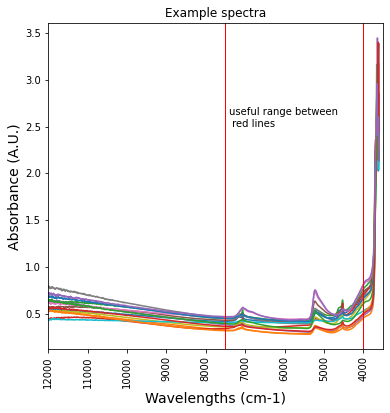

In [23]:
plt.figure(figsize= (6,6))

plt.plot(df_NIR_FTIRspectra['labda'],df_NIR_FTIRspectra.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]) 

plt.title('Example spectra')


plt.xticks(rotation=90)
plt.xlim(12000,3500)
plt.ylabel('Absorbance (A.U.)', fontsize=14)
plt.xlabel('Wavelengths (cm-1)', fontsize = 14)

plt.axvline(x=7500 , ymin=0, ymax=1, color='r', linewidth = 1)
plt.axvline(x=4000, ymin=0, ymax=1, color='r', linewidth = 1)
plt.text(7400, 2.5, 'useful range between \n red lines')

In the region 12000 - 7500 cm-1 there are no peaks, this part of the spectrum can be ignored
below 4000 cm-1 the signal is unrealistic.
It is an experimental artifact and this part of the spectrum should be cut off.

Absorbance in this range is analized with mid-range FTIR spectrometers (see section 3.2.2 below)

In [24]:
df_NIR_FTIRspectra =  df_NIR_FTIRspectra[df_NIR_FTIRspectra['labda'] < 7500]  
df_NIR_FTIRspectra = df_NIR_FTIRspectra[df_NIR_FTIRspectra['labda'] > 4000]

Text(0.5, 0, 'Wavelengths (cm-1)')

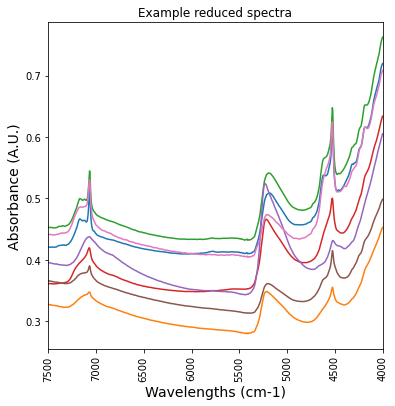

In [25]:
plt.figure(figsize= (6,6))

plt.plot(df_NIR_FTIRspectra['labda'],df_NIR_FTIRspectra.iloc[:, [4,5,6,12,16,17,48]]) 

plt.title('Example reduced spectra')

plt.xticks(rotation=90)
plt.xlim(7500,4000)
plt.ylabel('Absorbance (A.U.)', fontsize=14)
plt.xlabel('Wavelengths (cm-1)', fontsize = 14)

In [26]:
# change original dataset accordingly

df_NIR_reindexed = df_NIR_FTIRspectra.set_index('labda')
near_infrared_df = df_NIR_reindexed.T
near_infrared_df.head()

labda,7498,7494,7491,7487,7483,7479,7475,7471,7467,7464,...,4038,4035,4031,4027,4023,4019,4015,4011,4008,4004
icr033603,0.469107,0.469056,0.469180,0.469344,0.469312,0.469145,0.469012,0.469019,0.469138,0.469201,...,0.693520,0.696103,0.698850,0.701674,0.704414,0.707121,0.709787,0.712360,0.714864,0.717183
icr042897,0.453903,0.453874,0.453821,0.453781,0.453818,0.453874,0.453957,0.454082,0.454211,0.454340,...,0.679447,0.681886,0.684869,0.687917,0.690609,0.692926,0.694870,0.696561,0.698304,0.700157
icr049675,0.311495,0.311474,0.311484,0.311448,0.311298,0.311103,0.310900,0.310745,0.310745,0.310800,...,0.471828,0.473717,0.475707,0.477803,0.479886,0.481793,0.483479,0.485172,0.487041,0.488976
icr034693,0.420559,0.420480,0.420528,0.420549,0.420534,0.420425,0.420276,0.420284,0.420467,0.420655,...,0.695133,0.698124,0.701617,0.705556,0.709398,0.712633,0.715035,0.716666,0.718061,0.719766
icr033950,0.327227,0.327036,0.326880,0.326711,0.326502,0.326389,0.326441,0.326477,0.326314,0.325999,...,0.437366,0.439201,0.441031,0.442873,0.444723,0.446564,0.448291,0.449815,0.451223,0.452619


#### 3.2.2 MIR (middle infrared range) FTIR

spectral range 400 - 4000 cm-1

data recorded with three spectrometers that differ for the method for collecting data.

- ALPHA Kbr spectrometer: transmission, using samples pressed into a Kbr pellet
- ALPHA ZnSe spectrometer: reflection over a diamond window and ZnSe filter / beam splitter
- Tensor27 Kbr spectrometer
further reading about experimental details can be found at afsis/2009-2013/Dry_Chemistry/ICRAF/SOP/METH07V01 ALPHA.pdf

and a general introduction can be found here:
https://www.shimadzu.com/an/service-support/technical-support/analysis-basics/ftirtalk/talk8.html

 - 2014-2018 Most FTIR spectra could not be opened using the Bruker open files library, in this kernel only those obtained with the Tensor27 spectrometer are analyzed


##### - ALPHA spectrometer - KBr window

In [27]:
KBR_SPECTRA_DIR = 'Bruker_Alpha_KBr/*'
AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF')
TANSIS_PATH = Path('afsis/tansis/Dry_Chemistry/ICRAF')
names = []
spectra = []

for path in tqdm(AFSIS_PATH.glob(KBR_SPECTRA_DIR )):
    if path.is_file():
        spect_data = read_file(path)
        spectra.append(spect_data["AB"])
        names.append(path.stem)
wave_nums = spect_data.get_range()

column_names = ['{:.0f}'.format(x) for x in wave_nums]
kbr_df = pd.DataFrame(spectra, index=names, columns=column_names)
kbr_df.head()

<ipython-input-27-e3c899a54c24>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm(AFSIS_PATH.glob(KBR_SPECTRA_DIR )):


,3998,3997,3996,3994,3993,3991,3990,3988,3987,3986,...,412,411,409,408,406,405,404,402,401,399
icr033603,0.908592,0.908981,0.909435,0.909956,0.910562,0.911266,0.912069,0.912953,0.913888,0.914843,...,1.849416,1.860089,1.872713,1.885405,1.896269,1.903926,1.908109,1.910104,1.912738,1.919517
icr042897,0.810133,0.809940,0.809745,0.809616,0.809566,0.809563,0.809558,0.809516,0.809437,0.809359,...,2.069042,2.098991,2.124525,2.143315,2.153621,2.154386,2.145273,2.126816,2.101002,2.071937
icr049675,0.711836,0.712355,0.713021,0.713747,0.714438,0.715037,0.715535,0.715951,0.716298,0.716546,...,2.042677,2.025819,2.009498,1.997672,1.991367,1.989609,1.990601,1.992822,1.995704,1.999495
icr034693,0.788686,0.789201,0.789494,0.789611,0.789634,0.789656,0.789744,0.789912,0.790109,0.790249,...,2.083768,2.084394,2.084220,2.081256,2.072820,2.055961,2.028284,1.989270,1.941584,1.891300
icr033950,0.752478,0.753251,0.753915,0.754423,0.754733,0.754816,0.754683,0.754402,0.754084,0.753866,...,1.925999,1.940593,1.958213,1.975761,1.988359,1.990657,1.979214,1.954502,1.920762,1.884145


In [28]:
# table with FTIR spectra for each sample
df_KBR_FTIRspectra = kbr_df.T.reset_index()

df_KBR_FTIRspectra = df_KBR_FTIRspectra.rename(columns={'index': 'labda'})
df_KBR_FTIRspectra.labda = pd.to_numeric(df_KBR_FTIRspectra.labda)

df_KBR_FTIRspectra.head()

,labda,icr033603,icr042897,icr049675,icr034693,icr033950,icr034794,icr015953,icr050394,icr048771,...,icr011182,icr073540,icr049437,icr037699,icr056181,icr055563,icr010159,icr074792,icr011321,icr062275
0,3998,0.908592,0.810133,0.711836,0.788686,0.752478,0.799947,0.819920,0.701762,0.854325,...,0.741123,0.707601,0.735885,0.792272,0.784010,0.675416,0.859956,0.675066,0.807336,0.753118
1,3997,0.908981,0.809940,0.712355,0.789201,0.753251,0.801083,0.819910,0.702142,0.854623,...,0.741535,0.707462,0.735881,0.793356,0.784840,0.675505,0.859586,0.675193,0.807802,0.753273
2,3996,0.909435,0.809745,0.713021,0.789494,0.753915,0.802259,0.820077,0.702510,0.854676,...,0.741678,0.707289,0.735951,0.794496,0.785365,0.675546,0.859557,0.675159,0.808202,0.753584
3,3994,0.909956,0.809616,0.713747,0.789611,0.754423,0.803318,0.820496,0.702824,0.854543,...,0.741524,0.707115,0.736090,0.795609,0.785554,0.675588,0.859890,0.674942,0.808552,0.754089
4,3993,0.910562,0.809566,0.714438,0.789634,0.754733,0.804114,0.821235,0.703081,0.854348,...,0.741103,0.706966,0.736295,0.796670,0.785448,0.675682,0.860528,0.674554,0.808865,0.754796


Text(0.5, 0, 'Wavelengths (cm-1)')

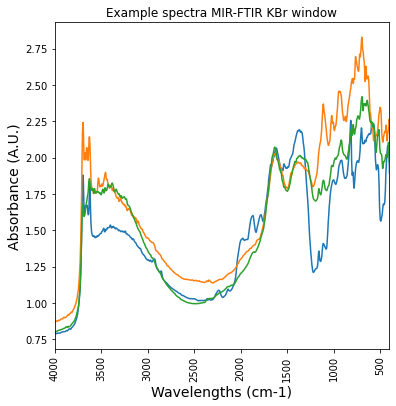

In [29]:
plt.figure(figsize= (6,6))

plt.plot(df_KBR_FTIRspectra['labda'],df_KBR_FTIRspectra.iloc[:, [4,257,100]]) 

plt.title('Example spectra MIR-FTIR KBr window')

plt.xticks(rotation=90)
plt.xlim(4000,400)
plt.ylabel('Absorbance (A.U.)', fontsize=14)
plt.xlabel('Wavelengths (cm-1)', fontsize = 14)


##### - Alpha spectrometer - ZnSe window

In [30]:
ZnSe_SPECTRA_DIR = 'Bruker_Alpha_ZnSe/*'
AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF')

names = []
spectra = []

for path in tqdm(AFSIS_PATH.glob(ZnSe_SPECTRA_DIR )):
    if path.is_file():
        spect_data = read_file(path)
        spectra.append(spect_data["AB"])
        names.append(path.stem)
wave_nums = spect_data.get_range()

column_names1 = ['{:.0f}'.format(x) for x in wave_nums]
ZnSe_df = pd.DataFrame(spectra, index=names, columns=column_names1)

<ipython-input-30-9a9e253138ae>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm(AFSIS_PATH.glob(ZnSe_SPECTRA_DIR )):


In [31]:
ZnSe_df.head()

,3996,3994,3992,3990,3988,3986,3984,3982,3980,3978,...,518,516,514,512,510,508,506,504,502,500
icr033603,1.336817,1.337777,1.338591,1.339180,1.339602,1.339999,1.340485,1.341091,1.341770,1.342445,...,2.274969,2.276752,2.252275,2.223028,2.210677,2.225878,2.251971,2.209258,2.221467,0.0
icr042897,1.217690,1.218229,1.218768,1.219244,1.219670,1.220118,1.220660,1.221307,1.221991,1.222615,...,2.221671,2.189322,2.175592,2.185125,2.209400,2.227240,2.216305,2.164982,2.129341,0.0
icr049675,1.155588,1.155937,1.156262,1.156588,1.156925,1.157270,1.157606,1.157913,1.158161,1.158312,...,2.400493,2.362777,2.327363,2.304740,2.297083,2.296757,2.288914,2.260693,2.206604,0.0
icr034693,1.215348,1.215774,1.216170,1.216544,1.216940,1.217407,1.217960,1.218564,1.219142,1.219622,...,2.146795,2.123838,2.091934,2.052702,2.009385,1.963674,1.915830,1.866890,1.819085,0.0
icr033950,1.163011,1.163466,1.163930,1.164330,1.164612,1.164770,1.164867,1.165003,1.165248,1.165577,...,2.140887,2.131997,2.106665,2.065614,2.013958,1.957800,1.904114,1.861121,1.835173,0.0


In [32]:
# - table with FTIR spectra for each sample

df_ZnSe_FTIRspectra = ZnSe_df.T.reset_index()

df_ZnSe_FTIRspectra = df_ZnSe_FTIRspectra.rename(columns={'index': 'labda'})
df_ZnSe_FTIRspectra.labda = pd.to_numeric(df_ZnSe_FTIRspectra.labda)

In [33]:
print("spectral range:", df_ZnSe_FTIRspectra.labda.min(), "cm-1 - ",df_ZnSe_FTIRspectra.labda.max(), "cm-1" )

spectral range: 500 cm-1 -  3996 cm-1


##### - Tensor 27 HTS-XT spectrometer

KBr window and wider range: both MID and Near IR

In [ ]:
HTSXT_SPECTRA_DIR = 'Bruker_HTSXT/*'
AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF')

names = []
spectra = []

for path in tqdm(AFSIS_PATH.glob(HTSXT_SPECTRA_DIR )):
    if path.is_file():
        spect_data = read_file(path)
        spectra.append(spect_data["AB"])
        names.append(path.stem)
wave_nums = spect_data.get_range()

column_names = ['{:.0f}'.format(x) for x in wave_nums]
htsxt_df = pd.DataFrame(spectra, index=names, columns=column_names)

<ipython-input-34-b1eed97d6425>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm(AFSIS_PATH.glob(HTSXT_SPECTRA_DIR )):


In [ ]:
print('Total measurements',len(htsxt_df.index),', unique samples', len(htsxt_df.index.unique()) )

In [ ]:
# table with FTIR spectra for each sample

df_htsxt_FTIRspectra = htsxt_df.T.reset_index()

df_htsxt_FTIRspectra = df_htsxt_FTIRspectra.rename(columns={'index': 'labda'})
df_htsxt_FTIRspectra.labda = pd.to_numeric(df_htsxt_FTIRspectra.labda)
print("spectral range:", df_htsxt_FTIRspectra.labda.min(), "cm-1 - ",df_htsxt_FTIRspectra.labda.max(), "cm-1" )

Are Tensor 27 HTS-XT spectrometer measurements reproducible?

In [ ]:
plt.plot(df_htsxt_FTIRspectra['labda'],df_htsxt_FTIRspectra['icr034794'], label = 'HTSXT') 

plt.title('Example same sample repetitions - HTSXT')
plt.legend()

plt.xticks(rotation=90)
plt.xlim(7500,400)
plt.ylabel('Absorbance (A.U.)', fontsize=14)
plt.xlabel('Wavelengths (cm-1)', fontsize = 14)

print('4 repetitions, identical result')

let's average the repetitions 

In [ ]:
htsxt_df = htsxt_df.reset_index()
htsxt_df.head()

In [ ]:
htsxt_df = htsxt_df.rename(columns={'index': 'SSN'})

In [ ]:
gb_htsxt = htsxt_df.groupby(['SSN']).mean().reset_index()
print(gb_htsxt.shape)


In [ ]:
gb_htsxt = gb_htsxt.set_index('SSN')

In [ ]:
gb_htsxt_FTIRspectra = gb_htsxt.T.reset_index()

gb_htsxt_FTIRspectra = gb_htsxt_FTIRspectra.rename(columns={'index': 'labda'})
gb_htsxt_FTIRspectra.labda = pd.to_numeric(gb_htsxt_FTIRspectra.labda)

In [ ]:
plt.plot(df_htsxt_FTIRspectra['labda'],df_htsxt_FTIRspectra['icr034794'], label = 'repetition') 
plt.plot(gb_htsxt_FTIRspectra['labda'],gb_htsxt_FTIRspectra['icr034794'],color = 'k', label = 'average') 
plt.title('Same sample repetitions and average')
plt.legend()

plt.xticks(rotation=90)
plt.xlim(7500,400)
plt.ylabel('Absorbance (A.U.)', fontsize=14)
plt.xlabel('Wavelengths (cm-1)', fontsize = 14)

print('4 repetitions, identical result')

In [ ]:
print('what is the difference between different spectrometers measurements?')
plt.figure(figsize= (6,6))

plt.plot(df_KBR_FTIRspectra['labda'],df_KBR_FTIRspectra['icr042897'], label = 'Kbr') 
plt.plot(df_ZnSe_FTIRspectra['labda'],df_ZnSe_FTIRspectra['icr042897'], label = 'ZnSe') 
plt.plot(gb_htsxt_FTIRspectra['labda'],gb_htsxt_FTIRspectra['icr042897'], label = 'HTSXT') 

plt.title('Example different spectrometers')
plt.legend()

plt.xticks(rotation=90)
plt.xlim(4000,400)
plt.ylabel('Absorbance (A.U.)', fontsize=14)
plt.xlabel('Wavelengths (cm-1)', fontsize = 14)

##### - build unique dataset for FTIR

In [ ]:
KBr_list = kbr_df.index.tolist()
ZnSe_list = ZnSe_df.index.tolist()
HTSXT_list = gb_htsxt.index.tolist()
print('samples tested with alpha-KBr', len(KBr_list))
print('samples tested with alpha-ZnSe', len(ZnSe_list))
print('samples tested with Tensor27', len(HTSXT_list))

print ("difference samples alpha spectrometers:",len(KBr_list) - len(ZnSe_list))
print ("difference samples alpha_kbr to tensor27 spectrometers:", len(KBr_list) - len(HTSXT_list))

In [ ]:
diff_list1 = np.setdiff1d(KBr_list,ZnSe_list)
print("samples tested using the Alpha-KBr and not the Alpha-ZnSe spectrometer")
print(len(diff_list1))

In [ ]:
diff_list_KBr = np.setdiff1d(HTSXT_list, KBr_list)
print("samples tested using the Tensor27 and not the Alpha-KBr spectrometer")
print(len(diff_list_KBr))

In [ ]:
mask_diff_kbr = kbr_df[kbr_df.index.isin(diff_list )]
mask_diff_znse = ZnSe_df[ZnSe_df.index.isin(diff_list )]
mask_diff_htsxt = gb_htsxt[gb_htsxt.index.isin(diff_list )]
print('KBr',len(mask_diff_kbr.index) ,'ZnSe', len(mask_diff_znse.index), 'HTSXT', len(mask_diff_htsxt.index))

 - Most information from Alpha spectrometers and MPA is redundant. Tensor27 NIR peaks provide the same information for both MID and Near IR range


## 4. Wet chemistry

In [ ]:
WET_CHEM_PATH1 = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
#elements = ['M3 Ca', 'M3 K', 'M3 Al']
#columns_to_load = elements + ['SSN']


wet_chem_df = pd.read_csv(WET_CHEM_PATH1, index_col='SSN')#, usecols=columns_to_load)
print(wet_chem_df.shape)
wet_chem_df.head()

In [ ]:
WET_CHEM_PATH2 = 'afsis/2009-2013/Wet_Chemistry/RRES/Wet_Chemistry_RRES.csv'
#elements = ['M3 Ca', 'M3 K', 'M3 Al']
#columns_to_load = elements + ['SSN']


wet_chem_df1 = pd.read_csv(WET_CHEM_PATH2, index_col='SSN')#, usecols=columns_to_load)
print(wet_chem_df1.shape)
wet_chem_df1.head()

## 5. Joined dataset

In [ ]:
df_elements = pd.merge(left=wet_chem_df1, right=df_xrf_reduced, left_on='SSN', right_on='SSN')
print(df_elements.shape)
print(df_elements.columns)
df_elements.head()

In [ ]:
df_geoelements = pd.merge(left=df_elements, right=df_geo1, left_on='SSN', right_on='SSN')

print(df_geoelements.shape)
print(df_geoelements.columns)
df_geoelements.head()

In [ ]:
pd.value_counts(df_geoelements['Country']).plot.bar(title='Measurements per country')

In [ ]:
print(len(df_geoelements['Soil material'].unique()))

In [ ]:
 #Draw map


m = folium.Map(location=[-3.5, 35.6], tiles="stamentoner", zoom_start=5)
 
for _, row in df_geoelements.iterrows():
    if row[['Latitude', 'Longitude']].notnull().all():
        folium.Marker([row['Latitude'], 
                       row['Longitude']], 
                      popup=row['SSN']
                     ).add_to(m)

#m

Image(filename='img/folium.png') 

In [ ]:
todrop = ['Soil material','Scientist', 'Site', 'Country', 'Region', 'Gid','RES ID']

df_geoelements_reduced = df_geoelements.drop(todrop, axis = 1) 
print(df_geoelements_reduced.columns)

In [ ]:
df_FTIR_reindexed = gb_htsxt_FTIRspectra.set_index('labda')
midnear_infrared_df = df_FTIR_reindexed.T.reset_index()

print(midnear_infrared_df.columns)

In [ ]:
df_alldata = pd.merge(left=df_geoelements_reduced, right=midnear_infrared_df, left_on='SSN', right_on='SSN')
df_alldata.head()

In [ ]:
df_alldata.to_csv( 'complete_analysis_dataset.csv',index=False)
